In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv',encoding='latin-1')

In [3]:
orders.head(8)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
5,6,2015-01-01,12:29:36
6,7,2015-01-01,12:50:37
7,8,2015-01-01,12:51:37


In [4]:
order_details.head(8)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
5,6,2,thai_ckn_l,1
6,7,3,ital_supr_m,1
7,8,3,prsc_argla_l,1


In [5]:
pizzas.head(8)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
5,cali_ckn_l,cali_ckn,L,20.75
6,ckn_alfredo_s,ckn_alfredo,S,12.75
7,ckn_alfredo_m,ckn_alfredo,M,16.75


In [6]:
pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [7]:
# Join the tables based on the provided data dictionary

# method chaining 
merged_data = pd.merge(pd.merge(pd.merge(orders, order_details, on='order_id'), pizzas, on='pizza_id'), pizza_types, on='pizza_type_id')
merged_data

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,21198,2015-12-28,15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,21225,2015-12-29,13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,21282,2015-12-31,12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [8]:
# pizza sold per category
merged_data['category'].value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

In [9]:
# pizza sold per size
merged_data['size'].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: size, dtype: int64

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [11]:
# Convert 'date' and 'time' columns to datetime format and create 'datetime' column
merged_data['datetime'] = pd.to_datetime(merged_data['date'] + ' ' + merged_data['time'], format='%Y-%m-%d %H:%M:%S')

# Print the updated DataFrame
merged_data


,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02 12:22:46
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 14:22:10
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 16:54:54
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-04 20:55:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-27 17:39:57
48616,21198,2015-12-28,15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-28 15:39:02
48617,21225,2015-12-29,13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-29 13:20:17
48618,21282,2015-12-31,12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-31 12:09:59


In [12]:
# add new col 'weekday'
merged_data['weekday'] = merged_data['datetime'].dt.strftime('%A')

merged_data

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime,weekday
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,Thursday
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02 12:22:46,Friday
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 14:22:10,Saturday
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 16:54:54,Saturday
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-04 20:55:29,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-27 17:39:57,Sunday
48616,21198,2015-12-28,15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-28 15:39:02,Monday
48617,21225,2015-12-29,13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-29 13:20:17,Tuesday
48618,21282,2015-12-31,12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015-12-31 12:09:59,Thursday


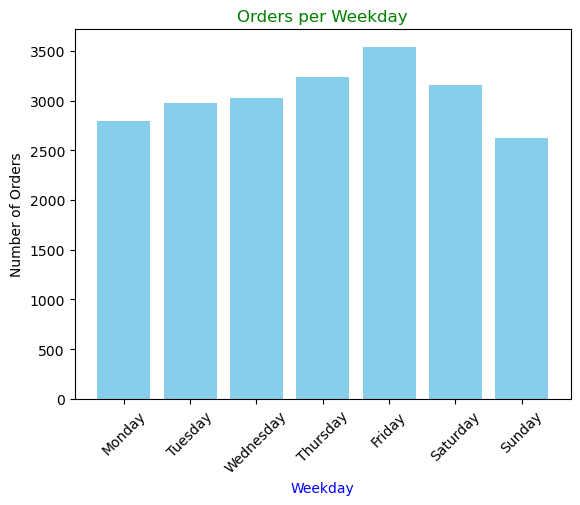

In [13]:
#orders per weekday

# Group the data by weekday and count the number of unique order IDs for each weekday
weekday_orders = merged_data.groupby('weekday')['order_id'].nunique()

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the weekday_orders series to match the weekday_order
weekday_orders = weekday_orders.reindex(weekday_order)

# Plot the bar chart
plt.bar(weekday_orders.index, weekday_orders.values,color='skyblue')
plt.xlabel('Weekday',color = 'blue')
plt.ylabel('Number of Orders')
plt.title('Orders per Weekday',color = 'green')
plt.xticks(rotation=45)  # Tilt the x-axis labels by 45 degrees
plt.show()

In [14]:
# Print the number of orders for each weekday
print("Orders per Weekday:")
for weekday, count in weekday_orders.items():
    print(f"{weekday}: {count} orders")

Orders per Weekday:
Monday: 2794 orders
Tuesday: 2973 orders
Wednesday: 3024 orders
Thursday: 3239 orders
Friday: 3538 orders
Saturday: 3158 orders
Sunday: 2624 orders


1. The occupied day of the week in terms of order count is Friday.
2. The days with relatively high order counts are Thursday, Saturday.
3. Monday, tuesday and Wednesday has no significant difference in order count
4. Sunday has the lowest order count among the weekdays.

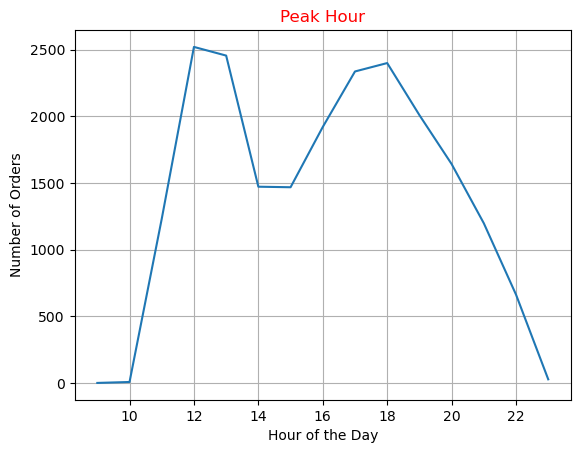

In [15]:
# finding peak hour

# Extract the hour from the 'time' column
merged_data['hour'] = pd.to_datetime(merged_data['datetime']).dt.hour

# Calculate the number of unique order_id per hour
orders_per_hour = merged_data.groupby('hour')['order_id'].nunique()

# Create the line chart
plt.plot(orders_per_hour.index, orders_per_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Peak Hour',color ='red')
plt.grid()
plt.show()

In [16]:
# Print the count of unique orders for each hour
for hour, count in orders_per_hour.items():
    print(f"Hour {hour}: {count} orders")

Hour 9: 1 orders
Hour 10: 8 orders
Hour 11: 1231 orders
Hour 12: 2520 orders
Hour 13: 2455 orders
Hour 14: 1472 orders
Hour 15: 1468 orders
Hour 16: 1920 orders
Hour 17: 2336 orders
Hour 18: 2399 orders
Hour 19: 2009 orders
Hour 20: 1642 orders
Hour 21: 1198 orders
Hour 22: 663 orders
Hour 23: 28 orders



The busiest time for orders is around noon, especially at 12 o'clock, with a peak of 2520 orders. Other busy hours include 11, 13, 16, 17, and 18, with significant order volumes. Evening hours, particularly 19 and 20, also see a rush of orders, likely during dinner time. In contrast, early morning and late night hours, such as 9, 22, and 23, experience lower order activity, with hour 9 recording the fewest orders at just 1. Understanding these fluctuations in order volume can help optimize business operations and customer service.

In [17]:
# number of customers per day
customers_per_day = merged_data.groupby(merged_data['date'])['order_id'].nunique().mean()

# Print the result
print("Number of orders we are expecting per day:")
print(customers_per_day)

Number of orders we are expecting per day:
59.63687150837989


In [18]:
# Best and Worst selling pizzas

# Group the data by pizza type and sum the quantities
pizza_sales = merged_data.groupby('pizza_type_id')['price'].sum()

pizza_sales = pizza_sales.sort_values(ascending=False)

In [19]:
# Top 10 Best Selling Pizzas is:
pizza_sales.head(10)

pizza_type_id
thai_ckn       42332.25
bbq_ckn        41683.00
cali_ckn       40166.50
classic_dlx    37631.50
spicy_ital     34163.50
southw_ckn     34081.75
ital_supr      32856.25
hawaiian       31561.75
four_cheese    31361.10
sicilian       30123.75
Name: price, dtype: float64

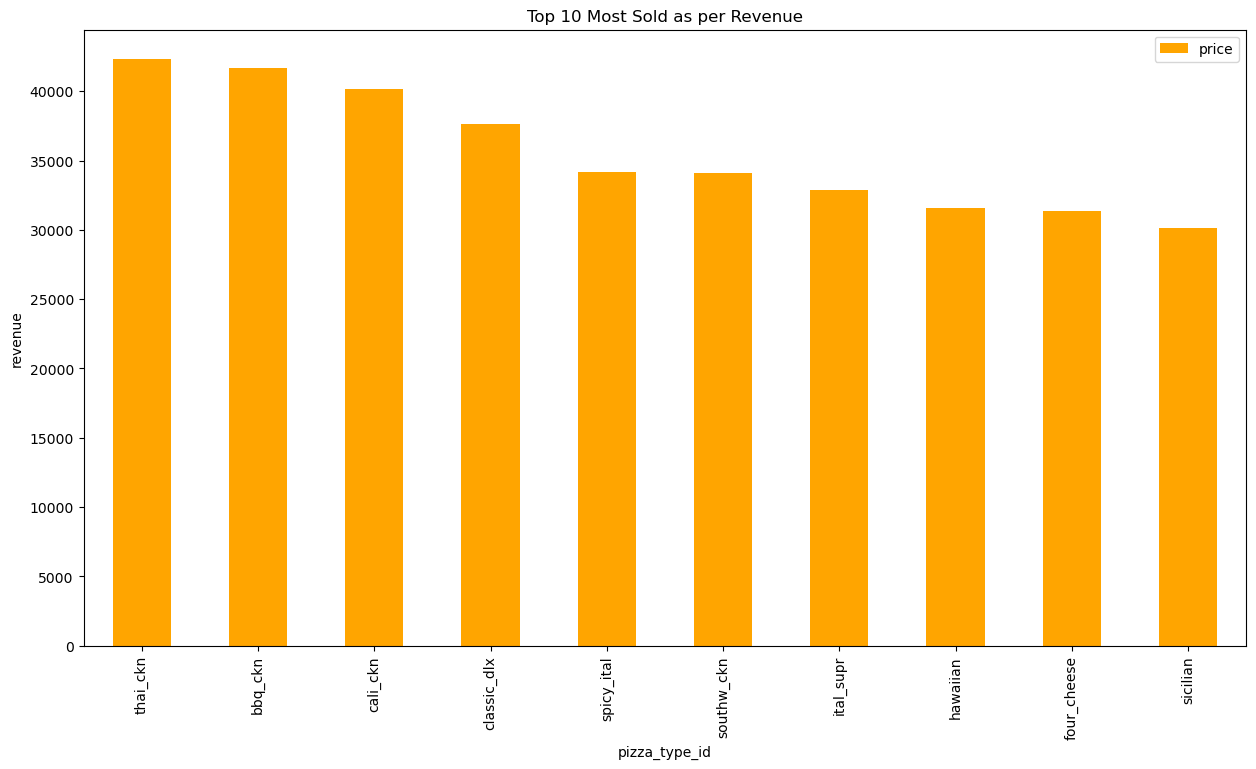

In [20]:
pizza_sales.head(10).to_frame().plot(kind='bar',color='orange',figsize=(15,8))
plt.ylabel('revenue')
plt.title('Top 10 Most Sold as per Revenue')
plt.show()

In [21]:
#Top 10 Wrost Pizza is:
pizza_sales.tail(10)

pizza_type_id
ckn_alfredo     16779.00
ckn_pesto       16484.75
soppressata     16342.75
ital_veggie     15930.75
calabrese       15763.75
spin_pesto      15388.25
mediterraneo    15163.00
spinach_supr    15124.00
green_garden    13819.50
brie_carre      11352.00
Name: price, dtype: float64

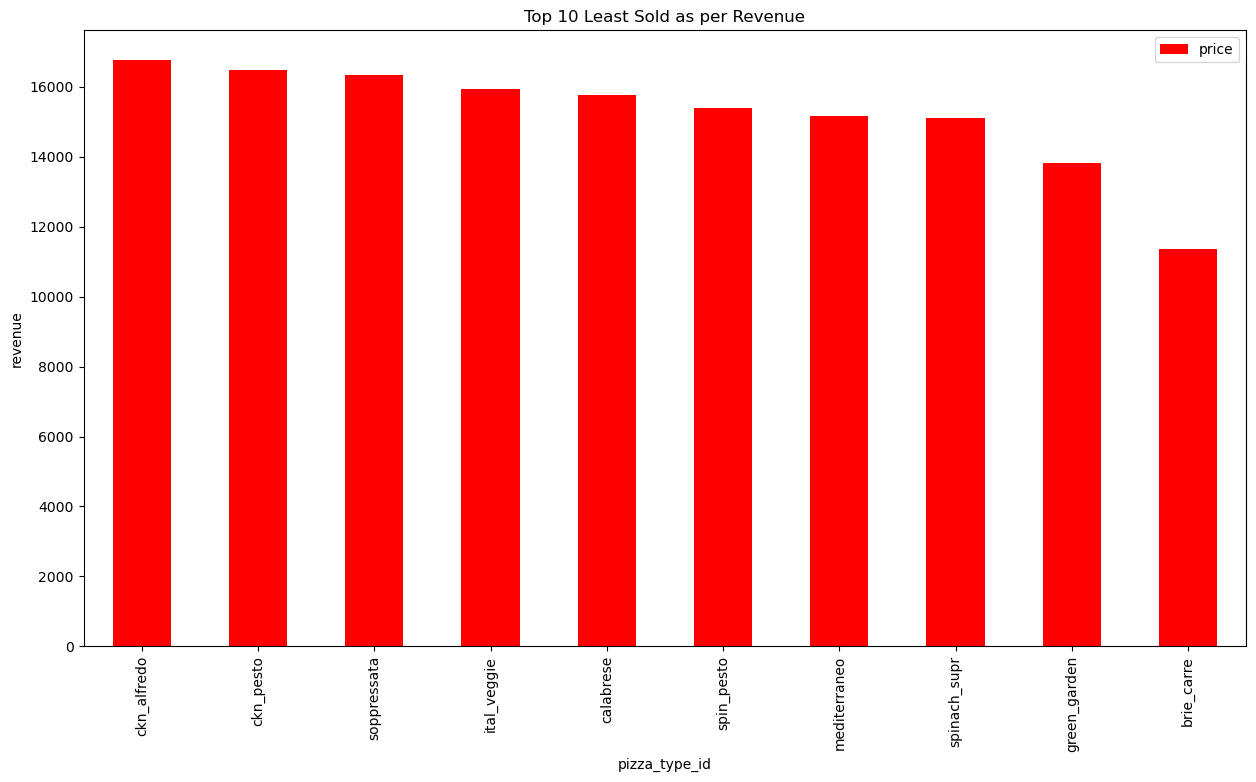

In [22]:
pizza_sales.tail(10).to_frame().plot(kind='bar',color='red',figsize=(15,8))
plt.ylabel('revenue')
plt.title('Top 10 Least Sold as per Revenue')
plt.show()

**Best Selling Pizza**:

Pizza Type: thai_ckn , Sales: $42,332.25

**Worst Selling Pizza**:

Pizza Type: brie_carre , Sales: $11,352.00

In [23]:
# Money in a year
merged_data['price'].sum()

801944.7

In [24]:
# Checking for seasonality in the sales

# Extracting month information from the 'date' column
merged_data['months'] = pd.to_datetime(merged_data['date'], infer_datetime_format=True).dt.month

# Counting the occurrences of each month
month_counts = merged_data['months'].value_counts().sort_values(ascending=False)
month_counts

7     4301
5     4239
3     4186
11    4185
1     4156
8     4094
4     4067
6     4025
2     3892
12    3859
9     3819
10    3797
Name: months, dtype: int64

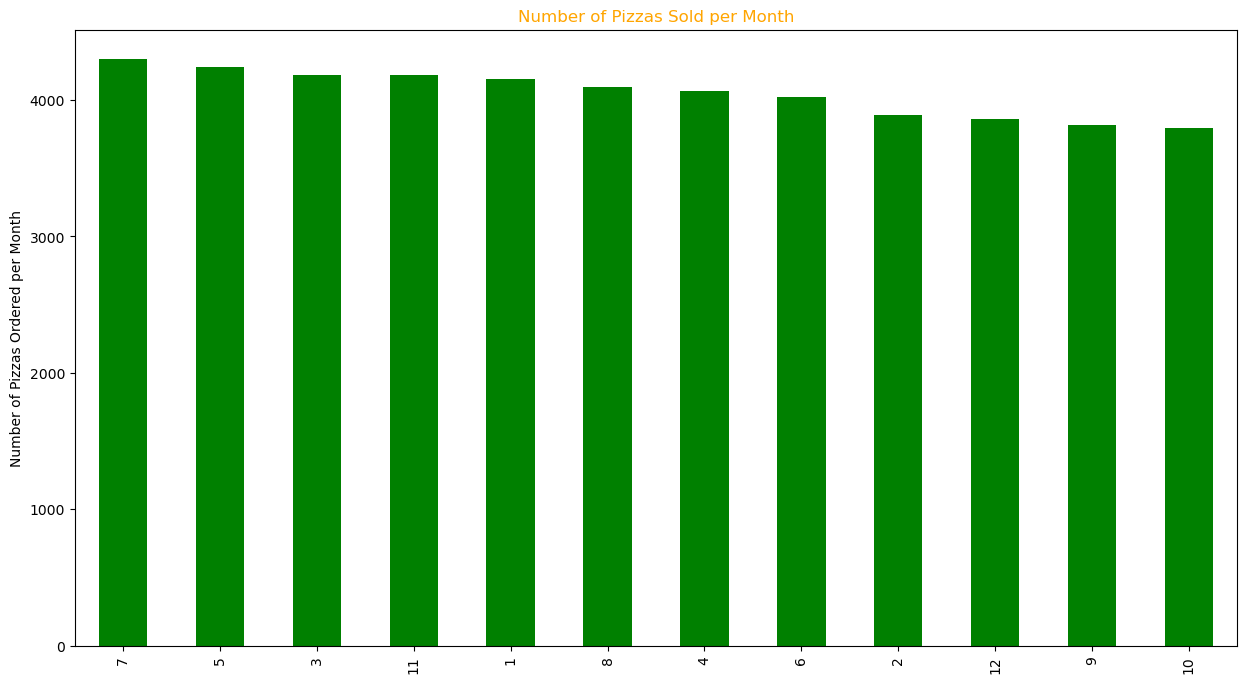

In [25]:
month_counts.plot(kind='bar', color='green', figsize=(15, 8))
plt.ylabel('Number of Pizzas Ordered per Month')
plt.title('Number of Pizzas Sold per Month', color='orange')
plt.show()

**Conclusion**

* Total revenue in 2015- 801944.71
*   Highest sale 261 on Date- 2015-11-26 and second hghest 259 on Date- 2015-11-27
*   July month has highest-4301 and may has second highest-4239 sales in the year







In [26]:
# average order value
average_order_value = merged_data['price'].mean()
print("Average Order Value: $", round(average_order_value, 2))

Average Order Value: $ 16.49


**Conclusion:**


* The busiest day of the week is Friday, followed by Thursday and Saturday. Monday, Tuesday and Wednesday have similar order counts, while Sunday has the lowest order count among the weekdays.

* The busiest time of the day is around midday (Hour 12), with a peak in activity. Other peak periods include Hours 11, 13, 16, and 17. Evening hours (18 and 19) also show a significant number of orders.

* The best-selling pizza is "thai_ckn" with sales amounting to 42,332.25 dollars while the worst-selling pizza is "brie_carre" with sales of 11,352.00.

* The average order value is $16.49.

**Recommendation:**

* Considering the high order count on Fridays, it may be beneficial to allocate additional resources and staff during that day to ensure efficient operations and customer satisfaction.

* The peak periods during midday and evening rush hours indicate a higher demand for pizzas. It might be useful to have a streamlined process and sufficient staff during these times to handle the increased order volume efficiently.

* Since "thai_ckn" is the best-selling pizza, it may be worthwhile to promote it further or introduce variations of the same flavor to cater to customer preferences.

* The low order count during early morning and late-night hours suggests a lower demand during those times. It may be worth considering adjusting staffing levels or operating hours to optimize resource utilization.